### ANIML -- Applied Neuroimaging Machine Learning 


# Intro to CNN's with Keras & MNIST, Predicting Digits


### Building Neural Networks with Keras Workshop
### 2/2 & 2/9/2018, Neuroscience Research Building Dive, UCLA
## Philipe Navarro
---

## Exercises
1. Increase the number of epochs (20 or more) until you see overfitting and plot Validation Accuracy vs Epochs.
2. Tune hyper-paramers, or even the model architure itself, until you achieve >99% accuracy. 
3. Make the classifier class much more flexible but allowing each classifier instace to be given its testing hyper-parameters. (Bonus: Train, evaulate and compare those different instances!)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [6]:
seed = 7
np.random.seed(seed)

In [2]:
# load up X & y nought
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

11493376/11490434 [==============================] - 25s 2us/step


In [3]:
X_train, y_train, X_test, y_test = X_train0, y_train0, X_test0, y_test0

In [39]:
class LeNetMnistClassifier():
    @staticmethod
    def toDigit(hot_encode):
        return np.argmax(hot_encode)
        
    def __init__(self, **kwargs):
        if kwargs.get("model_path", None):
            from keras.models import load_model
            self.model = load_model(kwargs['model_path'])
        else:
            self.activation_function = kwargs.pop('activation_function', 'relu')
            self.batch_size = kwargs.pop('batch_size', 128)
            self.epochs = kwargs.pop('epochs', 5)
            self.kernal_size = kwargs.pop('kernal_size', (3, 3))
            self.loss_function = kwargs.pop('loss_function', 'categorical_crossentropy')
            self.optimizer = kwargs.pop('optimizer', 'sgd')
            self.pool_size = kwargs.pop('pool_size', (2, 2))
            self.model = self._model()
    
    def _model(self):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=self.kernal_size,
                 activation=self.activation_function,
                 input_shape=(28,28,1)))
        model.add(MaxPooling2D(pool_size=self.pool_size))
        model.add(Conv2D(64, self.kernal_size, activation=self.activation_function))
        model.add(MaxPooling2D(pool_size=self.pool_size))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=self.activation_function))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))
        
        return model
    
    def predict(self, digits=()):
        return self.model.predict(digits)
    
    def evaluate(self, X_test=None, y_test=None):
        X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
        X_test = X_test.astype('float32')
        X_test/=255        
        number_of_classes = 10
        y_test = np_utils.to_categorical(y_test, number_of_classes)
        return self.model.evaluate(X_test, y_test)
    
    def preprocess_and_train(self, X_train=None, y_train=None, X_test=None, y_test=None):
        self._train(*self._preprocess(X_train, y_train, X_test, y_test))
        
    def _preprocess(self, X_train, y_train, X_test, y_test):
        X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
        X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        
        X_train/=255
        X_test/=255
        
        number_of_classes = 10
        y_train = np_utils.to_categorical(y_train, number_of_classes)
        y_test = np_utils.to_categorical(y_test, number_of_classes)
        
        return X_train, y_train, X_test, y_test
    
    def _train(self, X_train, y_train, X_test, y_test):
        self.model.compile(loss=self.loss_function,
              optimizer=self.optimizer,
              metrics=['accuracy'])
        
        fit_output = self.model.fit(X_train,
                        y_train,
                        batch_size=self.batch_size,
                        epochs=self.epochs,
                        verbose=1,
                        validation_data=(X_test, y_test))
        self._history = fit_output.history
        
        import time
        timestr = time.strftime("%Y%m%d-%H%M%S")
        self.model.save("lenet_mnist_{0}.h5".format(timestr)) 
    
    @property
    def history(self):
        return self._history

In [33]:
classifier = LeNetMnistClassifier(epochs=30, optimizer=keras.optimizers.Adadelta())
classifier.preprocess_and_train(X_train=X_train0, y_train=y_train0, X_test=X_test0, y_test=y_test0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 64s 1ms/step - loss: 0.3154 - acc: 0.9003 - val_loss: 0.0705 - val_acc: 0.9788
Epoch 2/30
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1085 - acc: 0.9676 - val_loss: 0.0531 - val_acc: 0.9825
Epoch 3/30
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0828 - acc: 0.9753 - val_loss: 0.0366 - val_acc: 0.9879
Epoch 4/30
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0686 - acc: 0.9795 - val_loss: 0.0333 - val_acc: 0.9882
Epoch 5/30
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0615 - acc: 0.9819 - val_loss: 0.0272 - val_acc: 0.9898
Epoch 6/30
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0531 - acc: 0.9839 - val_loss: 0.0274 - val_acc: 0.9901
Epoch 7/30
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0490 - acc: 0.9851 - val_loss: 0.0256 - val_acc

In [41]:
classifier = LeNetMnistClassifier(model_path="./lenet_mnist_20180208-235048.h5")
score = classifier.evaluate(X_test0, y_test0)
print("\nTest accuracy: ", score[1])

10000/10000 [==============================] - 4s 447us/step

Test accuracy:  0.9943


dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])


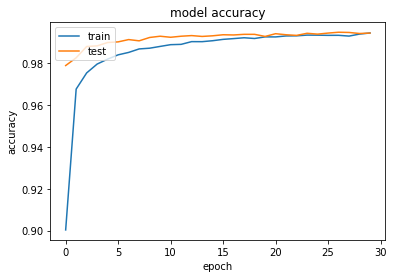

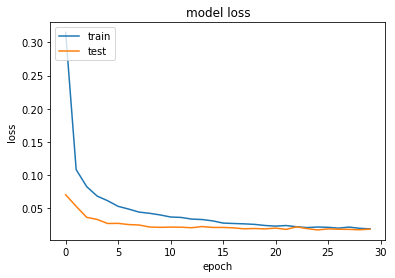

In [35]:
history = classifier.history
print(history.keys())
# summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()